In [ ]:
4. Apply both PCA and SVD for dimensionality reduction on the Breast Cancer dataset,
and compare the results in terms of variance explained and reconstruction accuracy.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [10]:
df=pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
df1=df.iloc[:,2:]

In [18]:
df1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
df_scaled=scale(df1)
df_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [24]:
pca=PCA(n_components=5)
pca_values=pca.fit_transform(df_scaled)
var=pca.explained_variance_ratio_
var

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768])

In [38]:
component=var*100
component

array([44.27202561, 18.97118204,  9.39316326,  6.60213492,  5.49576849])

In [28]:
from sklearn.decomposition import TruncatedSVD

In [42]:
svd=TruncatedSVD(n_components=5)
svd.fit(df1)
result=pd.DataFrame(svd.transform(df1))
result.head()



,0,1,2,3,4
0,2241.974276,-347.715560,27.537419,59.801498,-27.983956
1,2372.408403,-56.901670,-23.863162,-48.564064,-1.155950
2,2101.840280,-11.947627,-30.411386,-12.071248,-0.796227
3,697.432105,2.127700,46.793073,27.242121,-3.298571
4,2047.087229,137.765113,-67.523948,-20.172432,-9.589869


In [44]:
result.columns="pc0","pc1","pc2","pc3","pca4"
result.head()

,pc0,pc1,pc2,pc3,pca4
0,2241.974276,-347.715560,27.537419,59.801498,-27.983956
1,2372.408403,-56.901670,-23.863162,-48.564064,-1.155950
2,2101.840280,-11.947627,-30.411386,-12.071248,-0.796227
3,697.432105,2.127700,46.793073,27.242121,-3.298571
4,2047.087229,137.765113,-67.523948,-20.172432,-9.589869


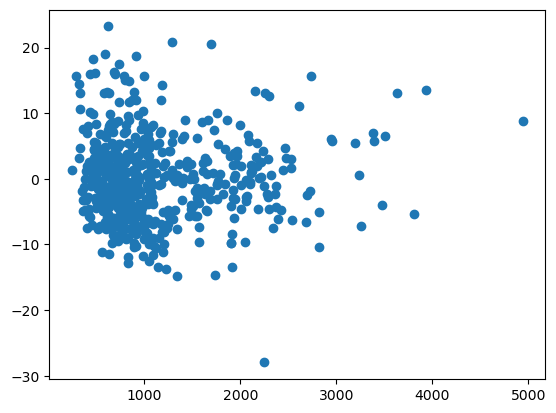

In [48]:
#Scatter diagram
import matplotlib.pylab as plt
plt.scatter(x=result.pc0,y=result.pca4)